In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(55)

In [4]:
# generate dataset
n=100
x=np.linspace(-5,5,n)
noise=np.random.normal(0,2,n)
y_model=12*np.sin(x)+0.5*(x**2)+2*x+5
y=y_model+noise

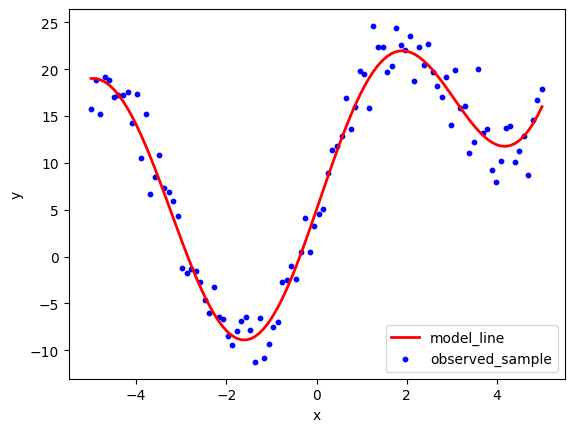

In [5]:
plt.plot(x,y_model,color='red',lw=2,label='model_line')
plt.scatter(x,y,color='blue',s=10,label='observed_sample')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
x_train_unsorted, x_test_unsorted, y_train_unsorted, y_test_unsorted = train_test_split(x, y, test_size=0.2, random_state=55)

In [8]:
#sort 
train_sort_index = np.argsort(x_train_unsorted.flatten())
x_train = x_train_unsorted[train_sort_index]
y_train = y_train_unsorted[train_sort_index]

test_sort_index = np.argsort(x_test_unsorted.flatten())
x_test = x_test_unsorted[test_sort_index]
y_test = y_test_unsorted[test_sort_index]

In [9]:
degrees=[1,2,5,8,12,14,16,18,20]

In [10]:
y_train_predict_list=[]
y_test_predict_list=[]
mse_train_list=[]
mse_tset_list=[]
for i in degrees:
    pipeline_polynomial_regression=Pipeline([('poly_features',PolynomialFeatures(degree=i)),('linear_regression',LinearRegression())])
    pipeline_polynomial_regression.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
    y_train_predict=pipeline_polynomial_regression.predict(x_train.reshape(-1,1))
    y_test_predict=pipeline_polynomial_regression.predict(x_test.reshape(-1,1))
    mse_train=mean_squared_error(y_train,y_train_predict)
    mse_tset=mean_squared_error(y_test,y_test_predict)
    y_train_predict_list.append(y_train_predict)
    y_test_predict_list.append(y_test_predict)
    mse_train_list.append(mse_train)
    mse_tset_list.append(mse_tset)



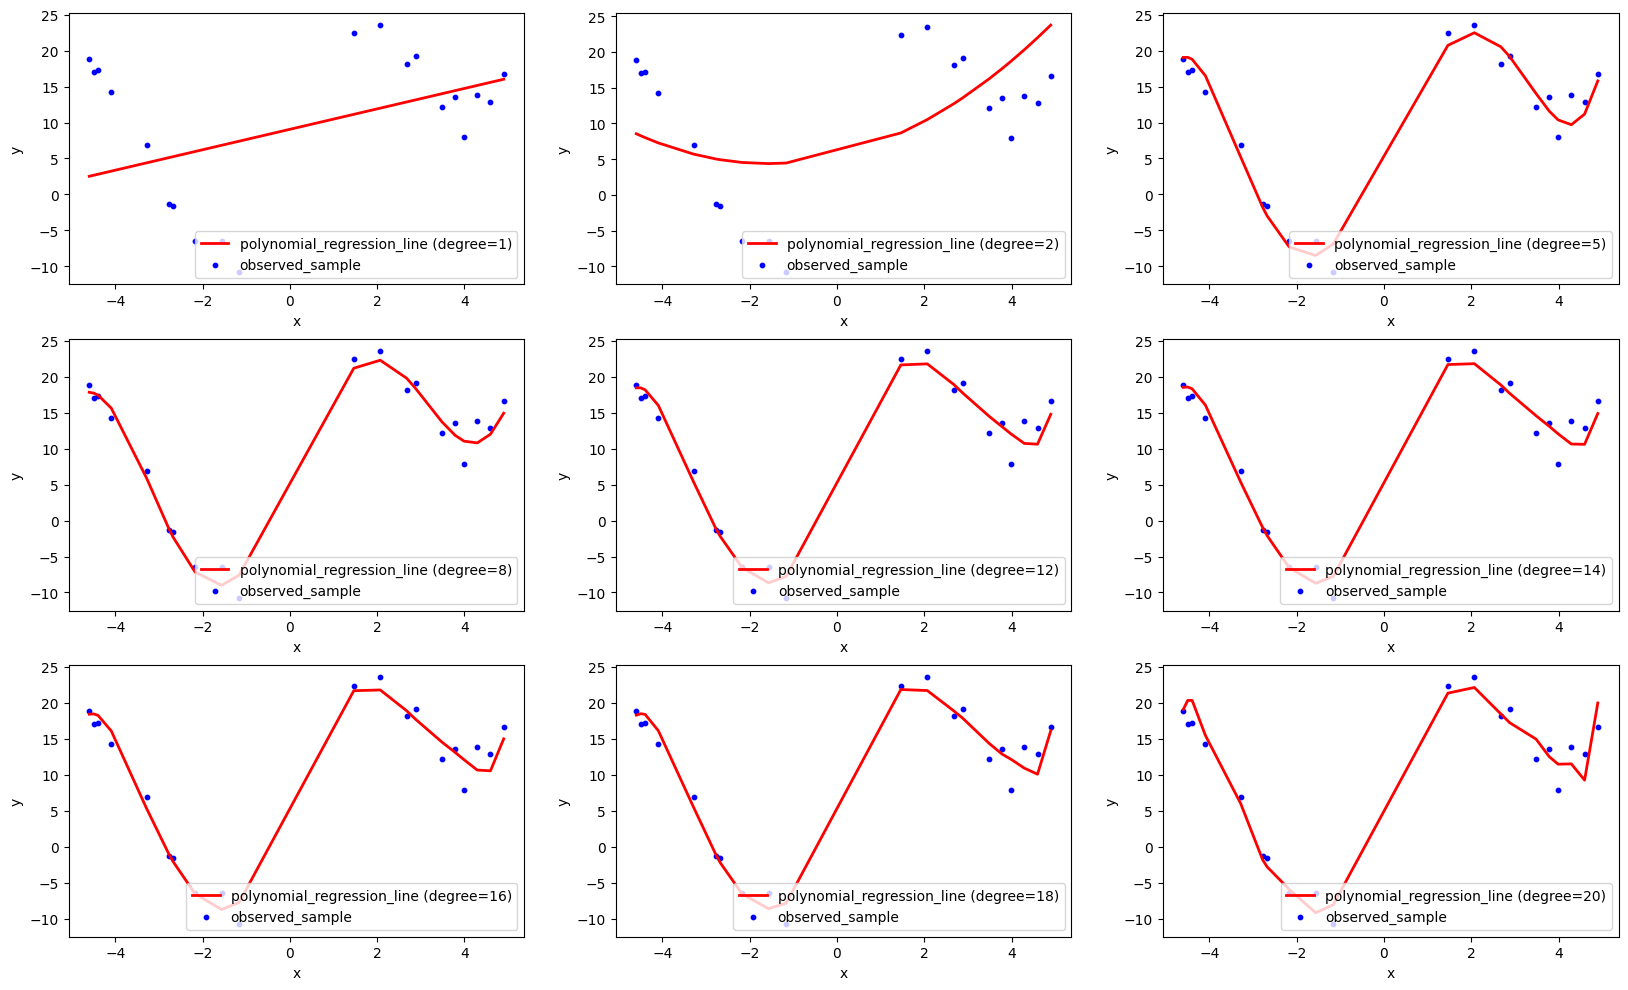

In [11]:

plt.figure(figsize=(20,12))
for i in range(len(degrees)):
    plt.subplot(3,3,i+1)
    plt.plot(x_test,y_test_predict_list[i],color='red',lw=2,label=f'polynomial_regression_line (degree={degrees[i]})')
    plt.scatter(x_test,y_test,color='blue',s=10,label='observed_sample')
    plt.xlabel('x')
    plt.ylabel('y') 
    plt.legend(loc="lower right")
plt.show()



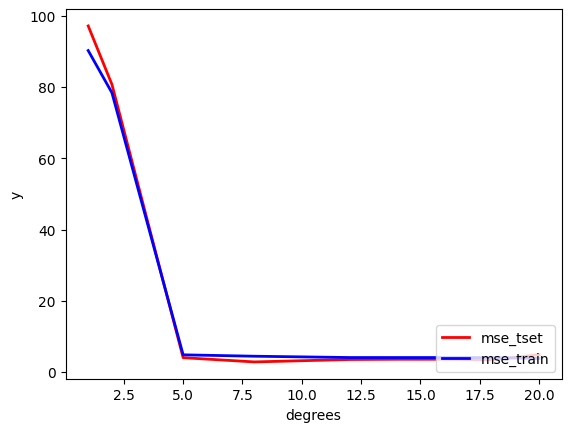

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [12]:
plt.plot(degrees,mse_tset_list,color='red',lw=2,label='mse_tset')
plt.plot(degrees,mse_train_list,color='blue',lw=2,label='mse_train')
plt.xlabel('degrees')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()
plt.plot


In [13]:
mse_tset_list

[97.17107769752445,
 80.74164004638318,
 4.04196242048262,
 2.848684653635126,
 3.5245310406511337,
 3.5950744274593553,
 3.5988423060526396,
 3.450266426420427,
 4.871267861086342]

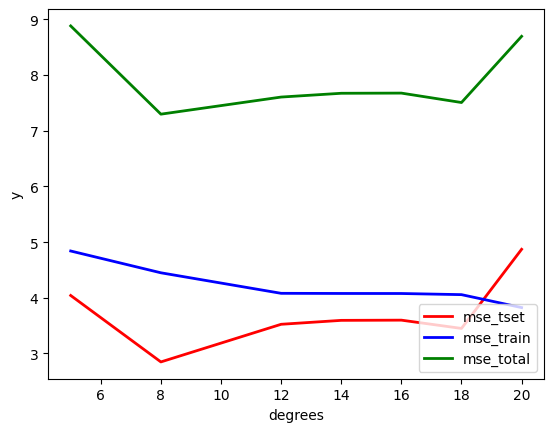

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [14]:
degrees_new=[]
mse_tset_list_new=[]
mse_train_list_new=[]

for i in range(2,9):
    degrees_new.append(degrees[i])
    mse_train_list_new.append(mse_train_list[i])
    mse_tset_list_new.append(mse_tset_list[i])
    
degrees_new=np.array(degrees_new)
mse_tset_list_new=np.array(mse_tset_list_new)
mse_train_list_new=np.array(mse_train_list_new)

plt.plot(degrees_new,mse_tset_list_new,color='red',lw=2,label='mse_tset')
plt.plot(degrees_new,mse_train_list_new,color='blue',lw=2,label='mse_train')
plt.plot(degrees_new,mse_tset_list_new+mse_train_list_new,color='green',lw=2,label='mse_total')
plt.xlabel('degrees')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()
plt.plot
